# Credit Risk Modeling 

Credit risk is the possibility of a loss resulting from a borrower's failiure to repay a loan. It is basically the risk in a situation where a person who has borrowed money will not repayat all. A loan is in deafult when the lending agency is certain that the loan will not be repayed. The likelihood that the borrower will default on a loan is called the **probability of default (PD)** and a machine learning model to determine or predict this is very useful to estimate the expected loss. The **expected loss** is the amount that the lender loses in case of a loan default. It is derived from the following three components:
 - Probability of Default (PD): the likelihood borrower will default on a loan
 - Exposure at Default (EAD): the amount outstanding at the time of default 
 - Loss Given Default (LGD): the ratio of the exposure against any recovery from the loss

**Expected Loss = (PD)(EAD)(LGD)**

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

In [2]:
crdf = pd.read_csv(r'C:\Users\kinne\Desktop\DataCamp\Datasets\raw credit data.csv')

### Exploring the Data 

In [3]:
crdf.shape

(32581, 12)

In [4]:
crdf.head(5)

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


In [5]:
crdf.dtypes

person_age                      int64
person_income                   int64
person_home_ownership          object
person_emp_length             float64
loan_intent                    object
loan_grade                     object
loan_amnt                       int64
loan_int_rate                 float64
loan_status                     int64
loan_percent_income           float64
cb_person_default_on_file      object
cb_person_cred_hist_length      int64
dtype: object

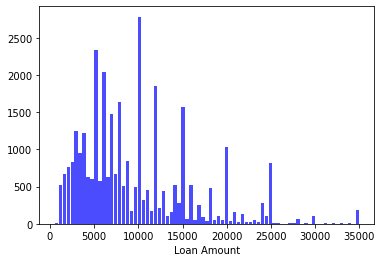

In [6]:
# Look at the distribution of loan amounts with a histogram
n, bins, patches = plt.hist(x=crdf['loan_amnt'], bins='auto', color='blue',alpha=0.7, rwidth=0.85)
plt.xlabel("Loan Amount")
plt.show()

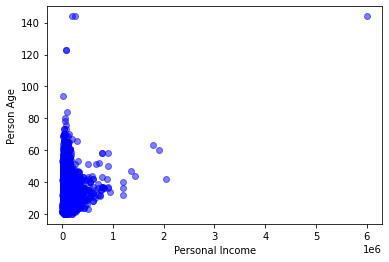

In [7]:
# Plot a scatter plot of income against age
plt.scatter(crdf['person_income'], crdf['person_age'], color='blue', alpha=0.5)
plt.xlabel('Personal Income')
plt.ylabel('Person Age')
plt.show()

In [8]:
pd.crosstab(crdf['loan_intent'], crdf['loan_status'], margins = True)

loan_status,0,1,All
loan_intent,,,
DEBTCONSOLIDATION,3722,1490,5212
EDUCATION,5342,1111,6453
HOMEIMPROVEMENT,2664,941,3605
MEDICAL,4450,1621,6071
PERSONAL,4423,1098,5521
VENTURE,4872,847,5719
All,25473,7108,32581


In [9]:
pd.crosstab(crdf['person_home_ownership'], [crdf['loan_grade'], crdf['loan_status']])

loan_grade                A          B           C         D          E       \
loan_status               0    1     0     1     0    1    0     1    0    1   
person_home_ownership                                                          
MORTGAGE               5219  239  3729   324  1934  321  658   553  178  161   
OTHER                    23    3    29     5    11    6    9    11    2    6   
OWN                     860   66   770    34   464   31  264    18   26   31   
RENT                   3602  765  4222  1338  2710  981  554  1559  137  423   

loan_grade              F      G      
loan_status             0   1  0   1  
person_home_ownership                 
MORTGAGE               36  61  0  31  
OTHER                   0   2  0   0  
OWN                     7   8  0   5  
RENT                   28  99  1  27

In [10]:
pd.crosstab(crdf['person_home_ownership'], crdf['loan_status'], values = crdf['loan_percent_income'], aggfunc = 'mean')

loan_status,0,1
person_home_ownership,,
MORTGAGE,0.146504,0.184882
OTHER,0.143784,0.300000
OWN,0.180013,0.297358
RENT,0.144611,0.264859


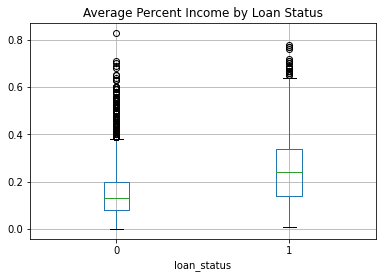

In [11]:
crdf.boxplot(column = ['loan_percent_income'], by = 'loan_status')
plt.title('Average Percent Income by Loan Status')
plt.suptitle('')
plt.show()

### Detecting and removing outliers

In [12]:
#Detecting outliers using crosstables
pd.crosstab(crdf['loan_status'], crdf['person_home_ownership'], values = crdf['person_emp_length'], aggfunc='max')

person_home_ownership,MORTGAGE,OTHER,OWN,RENT
loan_status,,,,
0,123.0,24.0,31.0,41.0
1,34.0,11.0,17.0,123.0


In [13]:
#Removing outliers from the person-emp_length column 
indices = crdf[crdf['person_emp_length'] > 60].index
crdf_new = crdf.drop(indices)

In [14]:
pd.crosstab(crdf_new['loan_status'], crdf_new['person_home_ownership'], values = crdf_new['person_emp_length'], aggfunc=['min','max'])

min                      max                  
person_home_ownership MORTGAGE OTHER  OWN RENT MORTGAGE OTHER   OWN  RENT
loan_status                                                              
0                          0.0   0.0  0.0  0.0     38.0  24.0  31.0  41.0
1                          0.0   0.0  0.0  0.0     34.0  11.0  17.0  27.0

### Visualizing outliers 

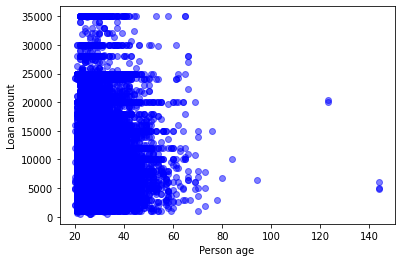

In [15]:
# Plot a scatter plot of person age against loan amount
plt.scatter(crdf['person_age'], crdf['loan_amnt'], color='blue', alpha=0.5)
plt.xlabel('Person age')
plt.ylabel('Loan amount')
plt.show()

In [16]:
# Use Pandas to drop the record from the data frame and create a new one
crdf_new = crdf_new.drop(crdf_new[crdf_new['person_age'] > 100].index)

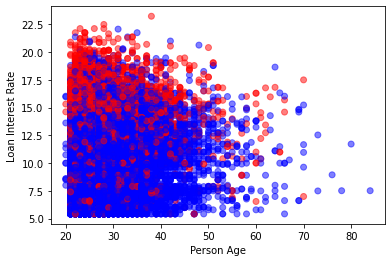

In [17]:
# Create a scatter plot of age and interest rate
colors = ["blue","red"]
plt.scatter(crdf_new['person_age'], crdf_new['loan_int_rate'],
            c = crdf_new['loan_status'],
            cmap = matplotlib.colors.ListedColormap(colors),
            alpha=0.5)
plt.xlabel("Person Age")
plt.ylabel("Loan Interest Rate")
plt.show()

### Dealing with missing values in credit data 

In [18]:
crdf.isnull().sum()

person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              895
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3116
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64

In [19]:
null_columns = crdf_new.columns[crdf_new.isnull().any()]
crdf_new[null_columns].isnull().sum()

person_emp_length     895
loan_int_rate        3115
dtype: int64

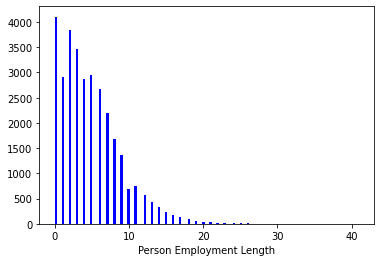

In [20]:
#Check the distribution of the employment length column before missing data imputation
n, bins, patches = plt.hist(crdf_new['person_emp_length'], bins='auto', color='blue')
plt.xlabel("Person Employment Length")
plt.show()

In [21]:
# Missing data imputation with median value
crdf_new['person_emp_length'].fillna((crdf_new['person_emp_length'].median()), inplace=True)

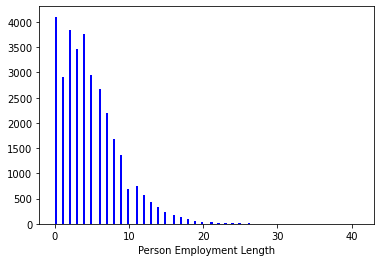

In [22]:
# Create a histogram of employment length after missing value impuatation 
n, bins, patches = plt.hist(crdf_new['person_emp_length'], bins='auto', color='blue')
plt.xlabel("Person Employment Length")
plt.show()

#### Removing missing data records

**NOTE**: Similar to having missing data within loan_status, having missing data within loan_int_rate will make predictions difficult. Because interest rates are set by the company itself, having missing data in this column is very strange. It's possible that data ingestion issues created errors, but you cannot know for sure. It is best to .drop() these records before moving forward.

In [23]:
# Number of missing values in the column
crdf_new['loan_int_rate'].isnull().sum()

3115

In [24]:
indices = crdf_new[crdf_new['loan_int_rate'].isnull()].index

In [25]:
crdf2 = crdf_new.drop(indices)

In [26]:
null_columns = crdf2.columns[crdf2.isnull().any()]
crdf2[null_columns].isnull().sum()

Series([], dtype: float64)

In [27]:
crdf2.isnull().sum()

person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_status                   0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
dtype: int64

### Logistic Regression for Predicitng Defaults 

The probability of default is the likelihood that someone will fail to repay a loan. This is expressed as a probability which is a value between zero and one. These probabilities are associated with our loan status column where a 1 is a default, and a 0 is a non default. The resulting predictions give us probabilities of default. The closer the value is to 1, the higher the probability of the loan being a default. To get these probabilities, we train machine learning models on our credit data columns, known as features, so the models learn how to use the data to predict the probabilities. These types of models are known as classification models, where the class is default or non-default. In the industry, two models are used frequently. These are logistic regressions, and decision trees. Both of these models can predict the probability of default, and tell us how important each column is for predictions.

The Logistic Regression is a supervised learning technique used for classification. The logistic regression is like a linear regression but only produces a value between 0 and 1. A logistic regression model can be used to predict default as it gives the probability of default based on the input features.  

In [32]:
from sklearn.linear_model import LogisticRegression

# Create the X and y data sets
X = crdf2[['loan_int_rate']]
y = crdf2[['loan_status']]

# Create and fit a logistic regression model
clf_logistic_single = LogisticRegression()
clf_logistic_single.fit(X, np.ravel(y))

# Print the parameters of the model
print(clf_logistic_single.get_params())

# Print the intercept of the model
print(clf_logistic_single.intercept_)

{'C': 1.0, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 100, 'multi_class': 'auto', 'n_jobs': None, 'penalty': 'l2', 'random_state': None, 'solver': 'lbfgs', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}
[-4.45785901]


#### Multivariate Logistic Regression

The y-intercept of the function and the overall log-odds of non-default. In addition to the **intercept_**, which is an attribute of the model, LogisticRegression() models also have the **.coef_ attribute**. This shows how important each training column is for predicting the probability of default.

In [33]:
# Create X data for the model
X_multi = crdf2[['loan_int_rate', 'person_emp_length']]

# Create a set of y data for training
y = crdf2[['loan_status']]

# Create and train a new logistic regression
clf_logistic_multi = LogisticRegression(solver='lbfgs').fit(X_multi, np.ravel(y))

# Print the intercept of the model
print(clf_logistic_multi.intercept_)

[-4.21645549]


In [35]:
from sklearn.model_selection import train_test_split

# Create the X and y data sets
X = crdf2[['loan_int_rate','person_emp_length','person_income']]
y = crdf2[['loan_status']]

# Use test_train_split to create the training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=123)

# Create and fit the logistic regression model
clf_logistic = LogisticRegression(solver='lbfgs').fit(X_train, np.ravel(y_train))

# Print the models coefficients
print(clf_logistic.coef_)

[[ 1.28517496e-09 -2.27622202e-09 -2.17211991e-05]]


### Credit Model Performance